In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick as yellowbrick
from sklearn.model_selection import train_test_split


In [4]:
#unione dei dataset (verranno divisi poi per il test e per il training)
features = pd.concat([pd.read_csv('../../dataset_v1/'+labels + '.csv') for labels in ['hand_opened', 'hand_closed', 'one', 'spiderman']])
featuresv2 = pd.concat([pd.read_csv('../../dataset_v2/'+labels + '_v2.csv') for labels in ['hand_opened', 'hand_closed', 'one', 'spiderman']])
dataset = pd.concat([features,featuresv2])

In [5]:
#sostituzione della colonna handedness con la colonna is_right (0|1) 
dataset['is_right'] = 0
dataset.loc[dataset['handedness'] == 'Right', 'is_right'] = 1
dataset[dataset['is_right']== 1]
dataset.drop(columns=['handedness'], inplace=True)

In [6]:
dataset.head(3)


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,y18,z18,x19,y19,z19,x20,y20,z20,gesture,is_right
0,0.436459,1.029835,7.257333e-07,0.515812,1.007966,-0.044799,0.582073,0.953413,-0.075028,0.639527,...,0.732432,-0.122048,0.312438,0.671181,-0.140857,0.291136,0.612210,-0.150946,hand_opened,0
1,0.440497,1.037069,6.988757e-07,0.521399,1.010074,-0.041076,0.587852,0.957393,-0.071538,0.646615,...,0.736804,-0.133241,0.324201,0.673027,-0.149851,0.304530,0.609800,-0.159262,hand_opened,0
2,0.446310,1.041283,7.072587e-07,0.528277,1.014194,-0.039648,0.595027,0.958403,-0.067755,0.655301,...,0.740706,-0.124702,0.332755,0.677684,-0.140871,0.313983,0.614861,-0.149919,hand_opened,0


In [7]:
# replace 'gesture' column by multiple dummy columns
labels = pd.get_dummies(dataset['gesture'])
#eliminazione della label dal dataset
dataset.drop(columns=['gesture'], inplace=True)

In [8]:
dataset.columns

Index(['x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7',
       'x8', 'y8', 'z8', 'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11',
       'z11', 'x12', 'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14',
       'x15', 'y15', 'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18',
       'y18', 'z18', 'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'is_right'],
      dtype='object')

In [9]:
labels.columns

Index(['hand_closed', 'hand_opened', 'one', 'spiderman'], dtype='object')

In [10]:
#dividiamo il dataset in trainig e test
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

DecisionTree
============

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree,export_text

Regolarizzazione
================

In [53]:
results = []

for dept in range(1,40):
    model=DecisionTreeClassifier(max_depth=dept)
    model.fit(X_train,y_train)
    p_train=model.predict(X_train)
    p_test=model.predict(X_test)
    acc_train=accuracy_score(y_train,p_train)
    acc_test=accuracy_score(y_test,p_test)
    results.append([dept,acc_train,acc_test])
results = pd.DataFrame(results,columns=['depth','acc_train','acc_test'])
results



,depth,acc_train,acc_test
0,1,0.000000,0.000000
1,2,0.309586,0.314341
2,3,0.367161,0.352326
3,4,0.587574,0.559690
4,5,0.640981,0.631008
5,6,0.682563,0.661628
6,7,0.755355,0.718992
7,8,0.813706,0.765504
8,9,0.865659,0.806977
9,10,0.908016,0.836434


<Axes: >

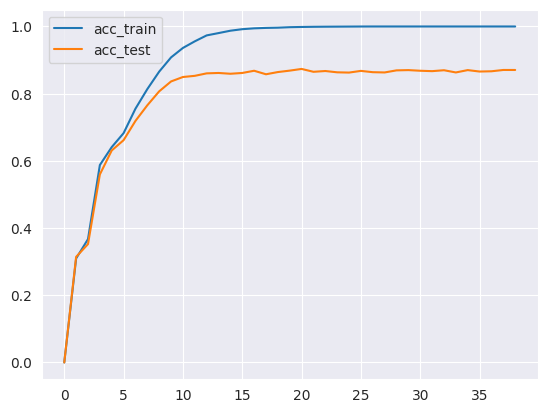

In [54]:
results.drop(columns=['depth'],inplace=True)
results.plot()




...Una volta selezionato la deep
================================

In [55]:
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [56]:
p_train=model.predict(X_train)
p_test=model.predict(X_test)

In [57]:
acc_train=accuracy_score(y_train,p_train)
acc_test=accuracy_score(y_test,p_test)

Metriche di valutazione
=======================


In [58]:
print("Accuracy on training set: {:.3f}".format(acc_train))
print("Accuracy on test set: {:.3f}".format(acc_test))

Accuracy on training set: 0.956
Accuracy on test set: 0.856


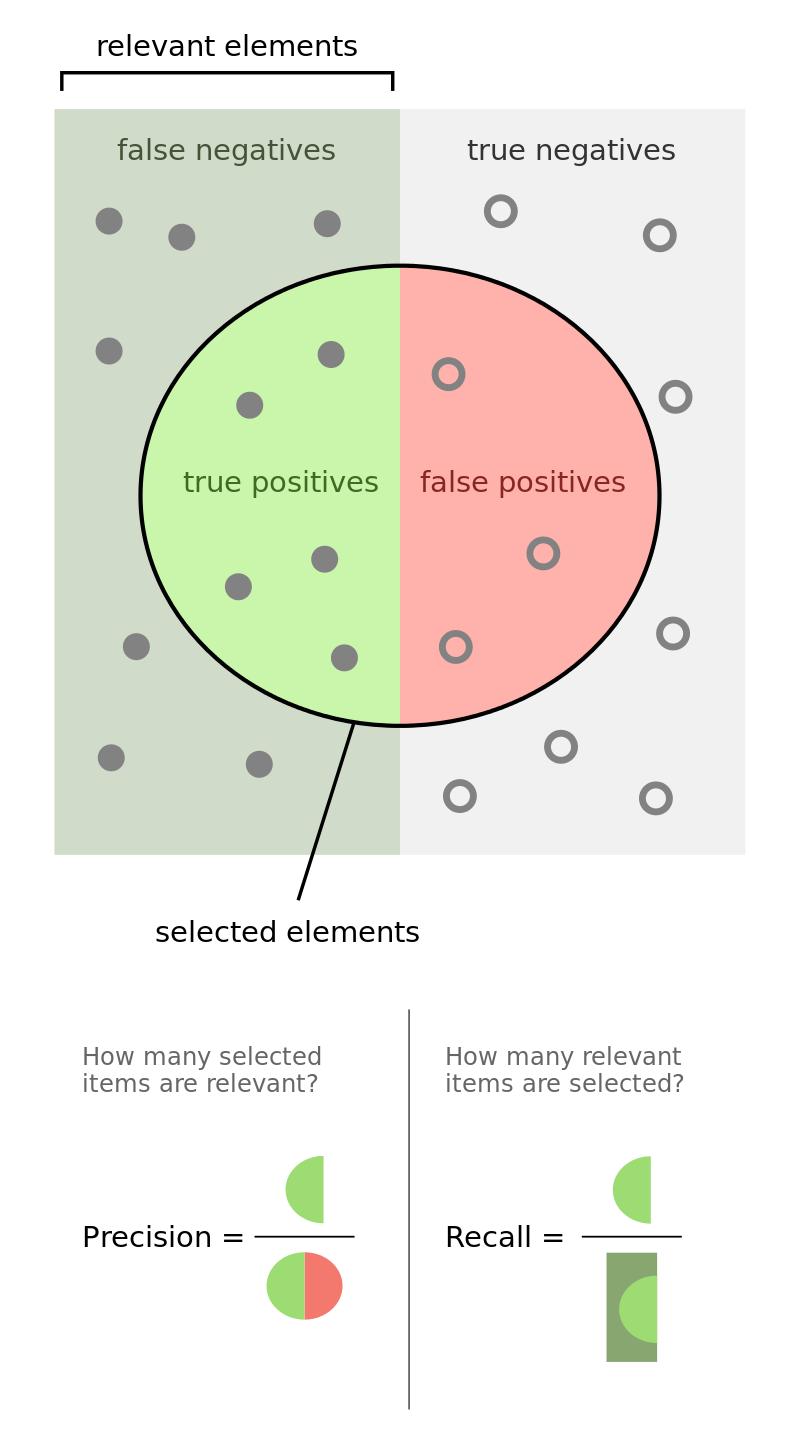

In [59]:
from sklearn.metrics import classification_report
from IPython.display import Image
Image("./image/Precision_vs_Recall.png",width=400,height=400)

In [60]:
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       580
           1       0.92      0.90      0.91       621
           2       0.84      0.86      0.85       759
           3       0.85      0.81      0.83       620

   micro avg       0.87      0.86      0.86      2580
   macro avg       0.87      0.86      0.86      2580
weighted avg       0.87      0.86      0.86      2580
 samples avg       0.86      0.86      0.86      2580



/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print(classification_report(y_train,p_train))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2383
           1       0.99      0.98      0.99      2443
           2       0.94      0.97      0.95      3071
           3       0.99      0.92      0.95      2420

   micro avg       0.97      0.96      0.96     10317
   macro avg       0.97      0.95      0.96     10317
weighted avg       0.97      0.96      0.96     10317
 samples avg       0.96      0.96      0.96     10317



/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matrice di confusione
=====================

In [62]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, p_test)

array([[[1936,   64],
        [  85,  495]],

       [[1907,   52],
        [  60,  561]],

       [[1695,  126],
        [ 106,  653]],

       [[1871,   89],
        [ 120,  500]]])

ROC curve
=========


In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_test, average="macro", multi_class="ovo")

0.9063098771987496

In [64]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcola la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, p_test, pos_label=1)

# Disegna la curva ROC
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


ValueError: multilabel-indicator format is not supported

Visualizzare l'albero di decisione
==================================


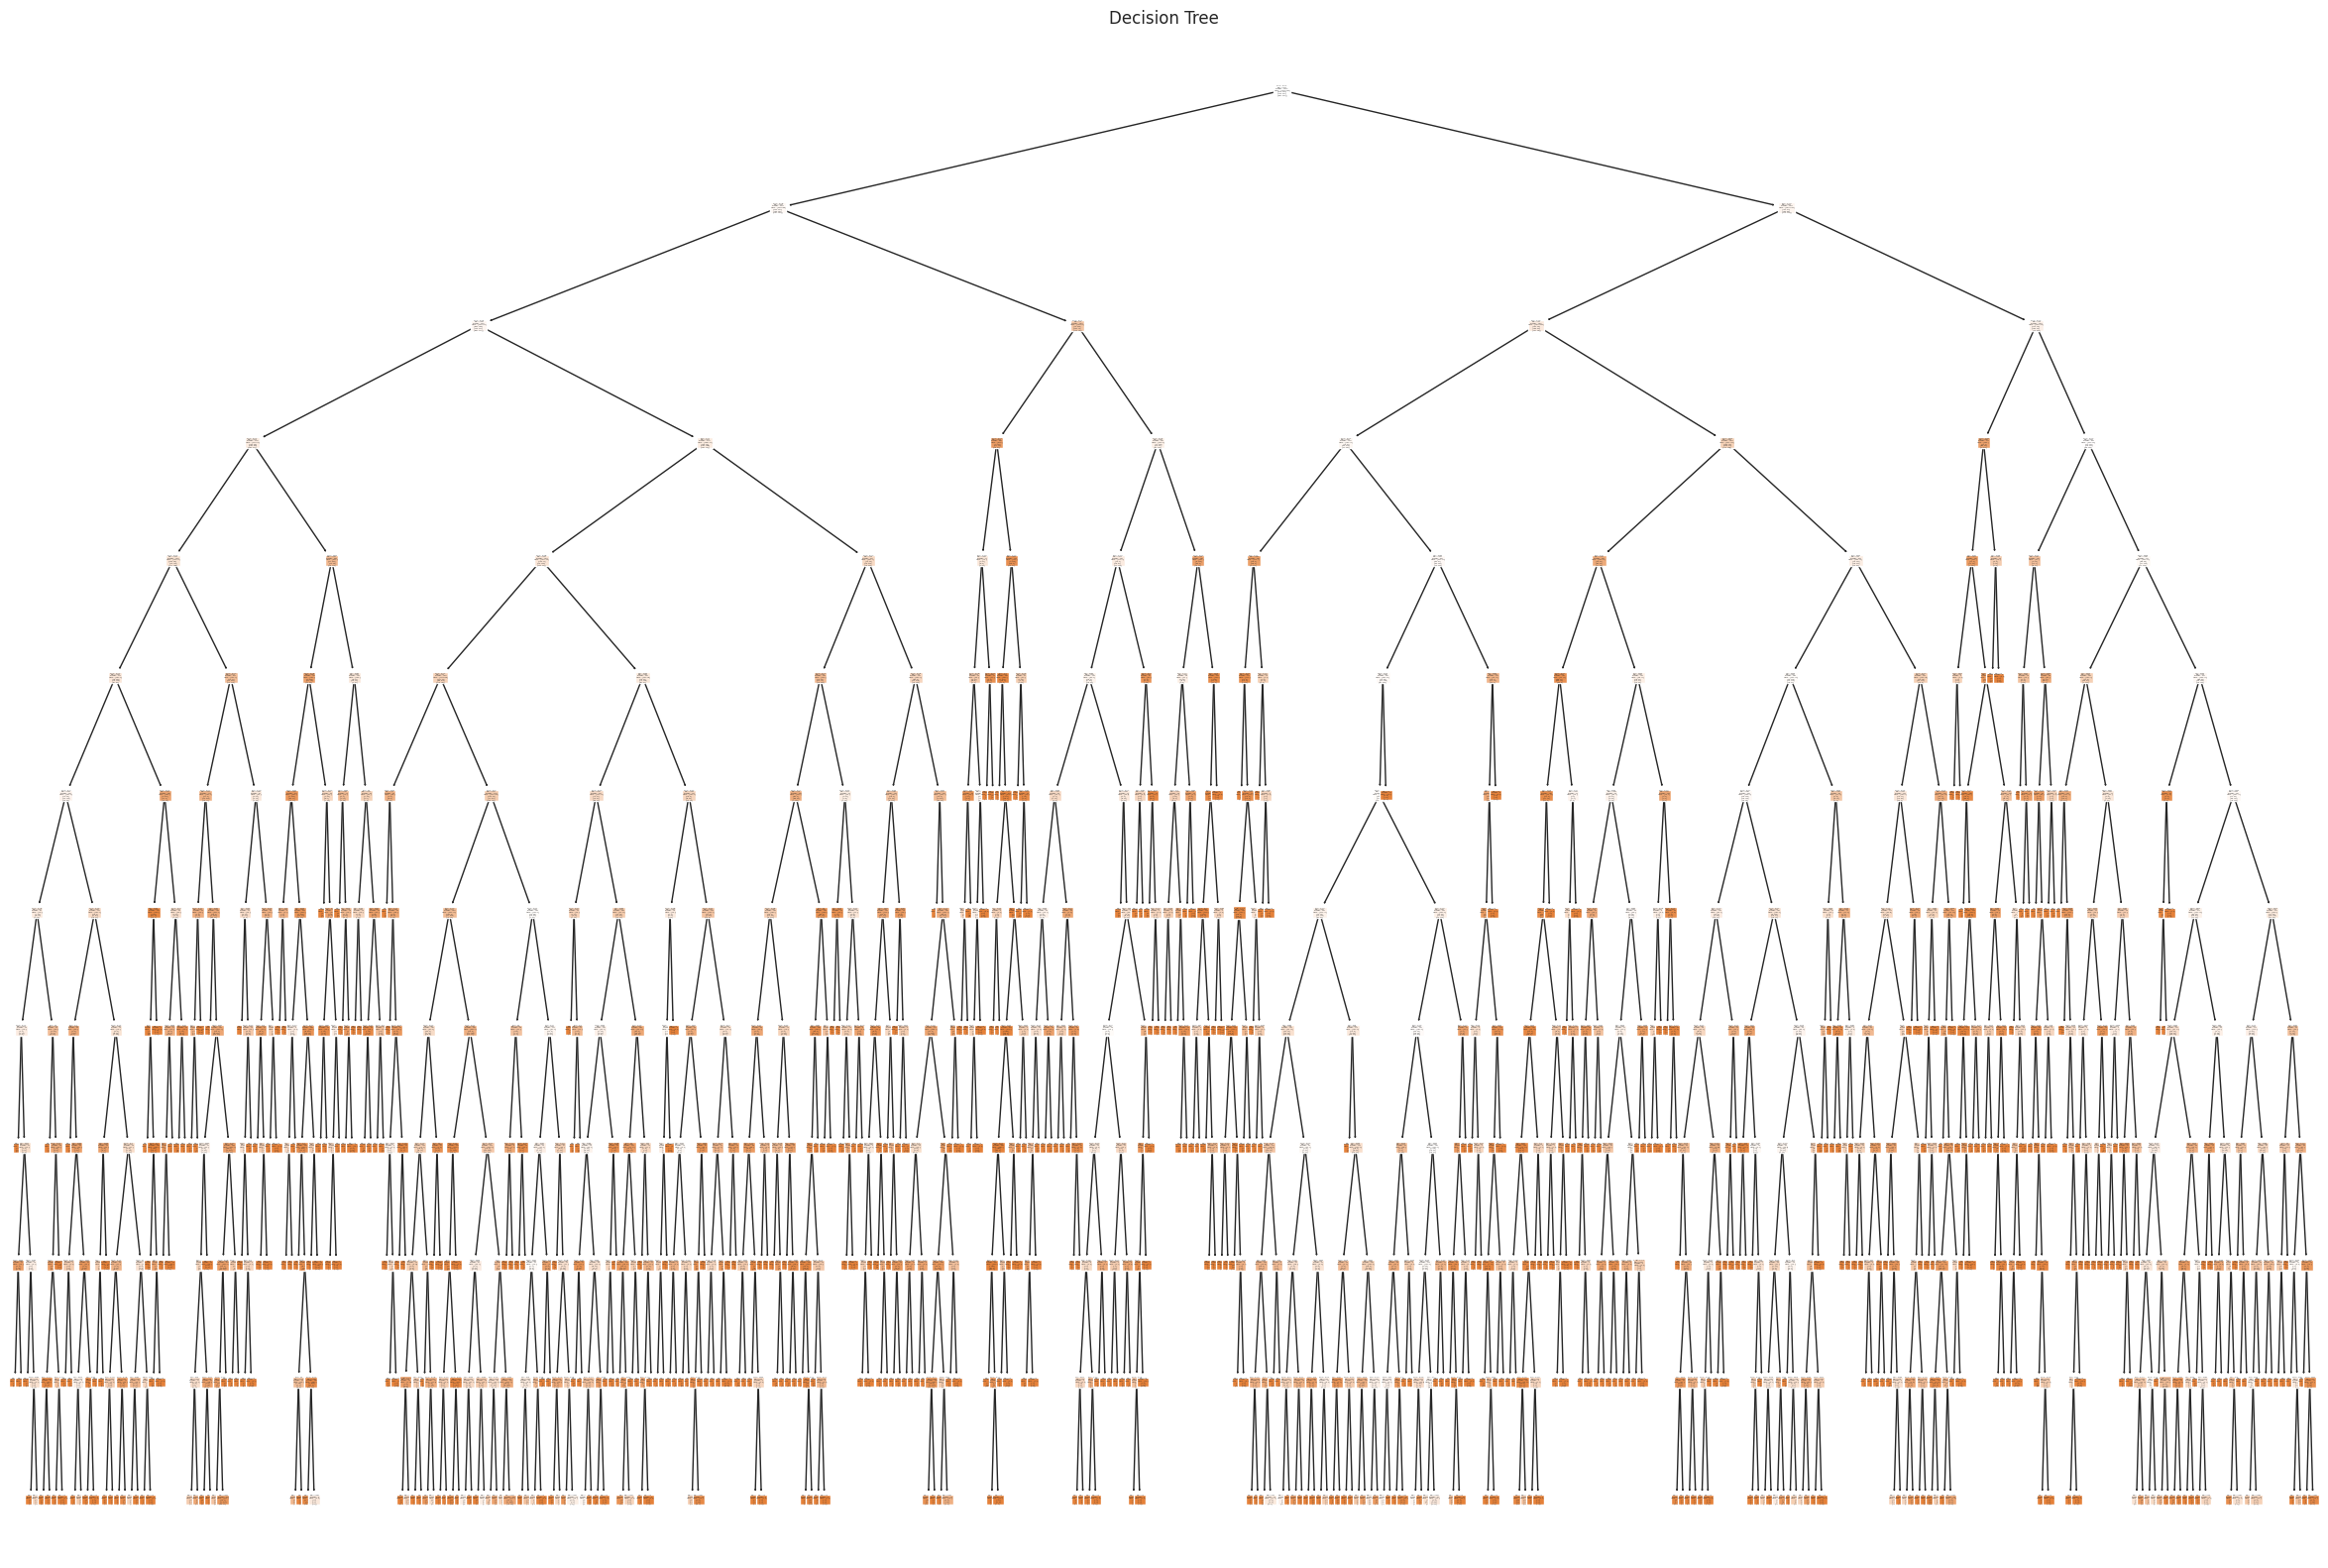

In [65]:
plt.figure(figsize=(30,20))
plot_tree(model,feature_names=X_train.columns,class_names=y_train.columns,filled=True)
plt.title("Decision Tree")
plt.show()

In [66]:
model.classes_

[array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8)]

In [67]:
print(export_text(model,feature_names=X_train.columns.tolist()))

|--- z16 <= -0.02
|   |--- z14 <= -0.04
|   |   |--- z16 <= -0.06
|   |   |   |--- z10 <= -0.06
|   |   |   |   |--- z16 <= -0.09
|   |   |   |   |   |--- z10 <= -0.10
|   |   |   |   |   |   |--- z16 <= -0.12
|   |   |   |   |   |   |   |--- z10 <= -0.14
|   |   |   |   |   |   |   |   |--- z10 <= -0.19
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- z10 >  -0.19
|   |   |   |   |   |   |   |   |   |--- y5 <= 0.58
|   |   |   |   |   |   |   |   |   |   |--- x14 <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- x14 >  0.10
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- y5 >  0.58
|   |   |   |   |   |   |   |   |   |   |--- y20 <= 0.79
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- y20 >  0.79
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |  

In [68]:
from sklearn.tree import export_graphviz
import graphviz

In [69]:
# genera il grafico dell'albero di decisione
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("tree") <-genera il pdf (?)
graph.view()

'Source.gv.pdf'

curve di apprendimento
======================

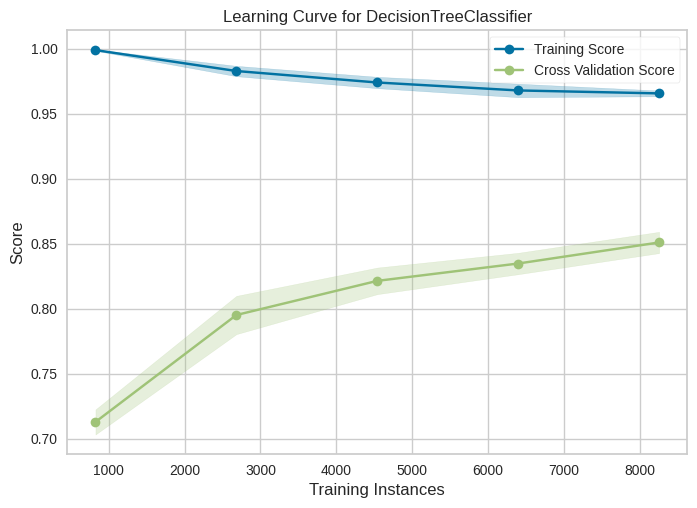

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
from yellowbrick.model_selection import learning_curve
learning_curve(model, X_train, y_train, cv=5, scoring='f1_weighted')

CROSS Validation
================

Approfondimenti
================

- Come visualizzare come e' fatto l'albero?
- Come interpretarlo?
- perche' questi risultati? Mi aspettavo peggio?
- Come utilizzare una rete neurale per la preparazione dei dati al decision Tree?


GRID SEARCH
===========

In [75]:
from sklearn.model_selection import GridSearchCV

# Definisci i parametri della griglia di ricerca
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18]}

# Inizializza l'oggetto GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=5)


# Esegui la grid search sul dataset iris
grid_search.fit(dataset, labels)

# Stampa i risultati della grid search
print("Migliori parametri:", grid_search.best_params_)
print("Miglior punteggio:", grid_search.best_score_)

Migliori parametri: {'criterion': 'gini', 'max_depth': 18}
Miglior punteggio: 0.49924226985400866


secondo test su un grid search
==============================

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
model= MLPClassifier()

In [79]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [80]:
hyper_params_space={
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'hidden_layer_sizes': [(10,10,10), (100,100,100), (100,100), (100,100,100,100), (100,100,100,100,100)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1,],
}

In [81]:
grid=GridSearchCV(
    model,
    param_grid=hyper_params_space,
    verbose=2,
    cv=5,
    refit='precision_macro',
    scoring=['precision_macro','recall_macro','f1_macro','accuracy']
)

In [82]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   2.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   2.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  15.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  19.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  20.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  16.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  18.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  17.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  11.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  15.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  14.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   6.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   6.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=  11.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learnin

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   4.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  17.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  17.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  16.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  17.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  15.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  14.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  19.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  13.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  14.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  12.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=  10.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   9.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   9.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   6.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   5.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   5.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   4.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   1.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   5.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  32.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=   9.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  18.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  15.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   9.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=  10.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=  19.5s
[CV] END alpha=0.0001

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   5.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   6.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   4.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   4.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  31.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  36.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  31.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  29.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  29.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  19.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  20.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  25.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  15.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  18.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  15.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   5.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   4.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   3.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   4.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   4.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   2.3s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.2s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.0s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.9s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.2s
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.8s
[CV] END alph

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  13.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  13.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   8.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   7.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  14.2s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   8.9s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   6.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   6.8s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_ini

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.1s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   6.0s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   8.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   4.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  13.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  13.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  13.4s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.9s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   9.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  10.8s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.1s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   6.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   6.2s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   6.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.5s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=  10.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  19.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  19.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  15.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  13.8s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   8.5s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   8.7s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   6.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   4.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  12.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  16.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  23.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  22.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  22.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  22.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  22.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=   9.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  13.5s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  21.3s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=   8.2s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  13.5s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  11.0s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   3.1s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; tota

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   5.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   7.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   6.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   5.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   5.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   2.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   6.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.0s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.4s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.1s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.2s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.7s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.1s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.9s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.4s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.0s
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  13.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  13.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  13.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   8.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  13.4s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  11.0s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   6.3s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   8.2s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.1s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.2s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   5.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; to

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   6.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   6.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   8.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   5.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  14.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  11.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  13.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  12.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=   9.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  10.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   9.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   8.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  12.2s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.8s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.3s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.4s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.8s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=  11.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=  14.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=  13.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   9.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  17.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.0s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  13.4s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  11.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  11.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  11.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  16.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   8.1s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.7s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   6.1s
[CV] END alpha=0.01, hidden_layer_sizes

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  12.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  12.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  11.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  13.4s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   6.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   4.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  12.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   8.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   4.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   4.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  24.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  27.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  33.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  31.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  31.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  16.8s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  12.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  19.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  11.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  16.9s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  13.5s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   6.3s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  25.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  25.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  22.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  23.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   5.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  15.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   6.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   6.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.1s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.5s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.6s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.9s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.3s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   1.1s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.2s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.9s
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  13.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  15.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  12.6s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   9.7s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   7.4s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   7.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  14.4s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.5s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   5.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.7s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time= 

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   4.2s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.6s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.7s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  14.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   3.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   0.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  13.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   8.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   8.6s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  10.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   8.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.7s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.4s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.4s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   2.5s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.5s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), le

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   7.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   8.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   8.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   7.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   8.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  18.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  21.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  26.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  26.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  11.6s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.8s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  17.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  18.8s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  20.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   3.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   5.5s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  12.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  12.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  17.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  12.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=  14.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  28.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  33.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  38.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  26.3s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  18.8s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  30.7s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  29.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  23.1s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  14.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  15.0s
[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  11.1s
[CV

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  24.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  17.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  23.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  24.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  20.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.2s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.1s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.3s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.2s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.0s
[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  20.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  20.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  20.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  21.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  20.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  16.0s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  18.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  21.3s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   9.6s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  11.4s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   6.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.3s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   4.6s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  16.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  18.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  19.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  19.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=  18.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  15.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  14.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  14.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  15.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  14.5s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  11.0s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  14.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  10.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  15.8s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  12.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   5.8s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.0s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   2.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   2.4s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.9s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.8s
[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=  10.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   5.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   5.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   5.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  26.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  26.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  28.8s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  25.0s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  23.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  17.2s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  16.5s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  22.6s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.6s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.0s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=  10.6s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learnin

/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   9.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   6.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   7.4s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   5.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   7.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  32.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  30.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  29.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  20.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  37.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  19.2s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  20.8s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  28.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   8.9s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   8.2s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  16.7s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  10.1s
[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  11.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  10.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   8.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   8.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   7.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=  10.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   1.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  14.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   6.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   8.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   6.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   7.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   5.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   1.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   8.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   6.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   6.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  10.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  13.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  16.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  15.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  15.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   6.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   6.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   6.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   5.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=   7.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   3.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  22.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  23.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  24.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  35.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  25.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  12.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  11.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=   7.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=   7.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=   9.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   3.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   5.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   4.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   4.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   4.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   1.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  22.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  24.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  34.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  29.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  24.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  40.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  39.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  35.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  29.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time=  36.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  18.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  13.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  13.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  13.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  11.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   6.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   7.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   7.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   8.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   6.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   2.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   8.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  28.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  27.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=10, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  27.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.0001; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   1.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001; total time=   1.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.1; total time=   0.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(10, 10, 10), learning_rate_init=1; total time=   0.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  19.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  18.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  23.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  25.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001; total time=  26.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  20.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  16.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  15.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  12.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001; total time=  14.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   3.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   4.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01; total time=   5.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   4.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   2.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1; total time=   3.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   6.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1; total time=   7.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  23.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  22.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  24.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  25.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001; total time=  29.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  12.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  15.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  16.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  13.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.001; total time=  10.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   5.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   4.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.01; total time=   6.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   3.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   1.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=0.1; total time=   2.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   3.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   1.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100), learning_rate_init=1; total time=   2.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  40.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  39.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  40.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  39.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001; total time=  37.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  27.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  19.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  24.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  20.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001; total time=  19.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   8.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   6.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.01; total time=   7.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   4.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   5.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   3.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   5.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.1; total time=   5.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  26.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  28.4s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  33.2s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  36.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=1; total time=  35.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time= 1.2min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time= 1.1min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time= 1.1min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time= 1.1min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.0001; total time= 1.2min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  33.7s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  30.9s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  38.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  35.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001; total time=  40.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  14.5s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  13.0s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=   9.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  13.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01; total time=  15.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   5.6s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   5.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   6.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   8.1s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.1; total time=   8.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  16.3s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time= 1.1min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time= 1.1min


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time=  59.8s


/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rino/pyProgetti/poseEstimation/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END alpha=100, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=1; total time= 1.0min


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100),
                                                (100, 100, 100, 100),
                                                (100, 100, 100, 100, 100)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1]},
             refit='precision_macro',
             scoring=['precision_macro', 'recall_macro', 'f1_macro',
                      'accuracy'],
             verbose=2)

In [83]:
grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (100, 100, 100, 100),
 'learning_rate_init': 0.001}

In [84]:
grid.best_score_

0.9716629751468349

In [85]:
grid.cv_results_

{'mean_fit_time': array([ 3.15625496,  3.03535614,  1.80413232,  0.6620049 ,  0.31667337,
        17.29491425, 15.44168816,  7.74307632,  3.71759839,  5.05680656,
        16.8599782 , 14.88905683,  7.70736971,  4.73888826,  3.26507607,
        26.91070442, 13.63403783, 11.06541471,  2.96530747,  4.35834618,
        31.62445641, 19.89412818, 10.45068703,  2.56610336,  4.04568558,
         3.14002533,  3.15932374,  1.60247908,  0.94568605,  0.52295156,
        14.14531202, 10.50827093,  6.45593934,  3.21191812,  8.69191136,
        10.9291523 , 10.77433343,  5.42410154,  2.20053606,  9.80012646,
        18.52223654, 14.77269382,  6.46719222,  3.83416533,  7.31312017,
        22.6259912 , 13.18898001,  9.09976912,  5.45337777,  3.88223858,
         3.01681376,  2.93585467,  1.29219699,  0.67605681,  1.62194724,
        14.13012118,  9.54266162,  5.61015329,  5.40810318, 10.88650827,
        10.40984392, 10.57556167,  4.48472271,  2.82635093, 11.93167925,
        18.07730198, 12.98749118, 

In [86]:
grid.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100))

In [87]:
model.score(X_test,y_test)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [89]:
m=MLPClassifier( **grid.best_params_)

In [90]:
from joblib import dump, load

In [91]:
dump(m, 'model_best_net.pkl')

['model_best_net.pkl']

In [92]:
grid.cv_results_

{'mean_fit_time': array([ 3.15625496,  3.03535614,  1.80413232,  0.6620049 ,  0.31667337,
        17.29491425, 15.44168816,  7.74307632,  3.71759839,  5.05680656,
        16.8599782 , 14.88905683,  7.70736971,  4.73888826,  3.26507607,
        26.91070442, 13.63403783, 11.06541471,  2.96530747,  4.35834618,
        31.62445641, 19.89412818, 10.45068703,  2.56610336,  4.04568558,
         3.14002533,  3.15932374,  1.60247908,  0.94568605,  0.52295156,
        14.14531202, 10.50827093,  6.45593934,  3.21191812,  8.69191136,
        10.9291523 , 10.77433343,  5.42410154,  2.20053606,  9.80012646,
        18.52223654, 14.77269382,  6.46719222,  3.83416533,  7.31312017,
        22.6259912 , 13.18898001,  9.09976912,  5.45337777,  3.88223858,
         3.01681376,  2.93585467,  1.29219699,  0.67605681,  1.62194724,
        14.13012118,  9.54266162,  5.61015329,  5.40810318, 10.88650827,
        10.40984392, 10.57556167,  4.48472271,  2.82635093, 11.93167925,
        18.07730198, 12.98749118, 

In [93]:
df=pd.DataFrame(grid.cv_results_)

In [94]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate_init',
       'params', 'split0_test_precision_macro', 'split1_test_precision_macro',
       'split2_test_precision_macro', 'split3_test_precision_macro',
       'split4_test_precision_macro', 'mean_test_precision_macro',
       'std_test_precision_macro', 'rank_test_precision_macro',
       'split0_test_recall_macro', 'split1_test_recall_macro',
       'split2_test_recall_macro', 'split3_test_recall_macro',
       'split4_test_recall_macro', 'mean_test_recall_macro',
       'std_test_recall_macro', 'rank_test_recall_macro',
       'split0_test_f1_macro', 'split1_test_f1_macro', 'split2_test_f1_macro',
       'split3_test_f1_macro', 'split4_test_f1_macro', 'mean_test_f1_macro',
       'std_test_f1_macro', 'rank_test_f1_macro', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'spli

In [95]:
df.sort_values(by='mean_test_precision_macro', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_precision_macro,split1_test_precision_macro,...,std_test_f1_macro,rank_test_f1_macro,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
41,14.772694,2.538497,0.015830,0.000417,0.001,"(100, 100, 100, 100)",0.001,"{'alpha': 0.001, 'hidden_layer_sizes': (100, 1...",0.972339,0.970651,...,0.003662,1,0.962694,0.963178,0.966554,0.957344,0.969947,0.963943,0.004208,1
66,12.987491,2.099132,0.017072,0.003139,0.01,"(100, 100, 100, 100)",0.001,"{'alpha': 0.01, 'hidden_layer_sizes': (100, 10...",0.969843,0.967456,...,0.003016,2,0.964147,0.957364,0.965099,0.960737,0.968492,0.963168,0.003811,2
21,19.894128,3.164842,0.020165,0.003596,0.0001,"(100, 100, 100, 100, 100)",0.001,"{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",0.966572,0.964740,...,0.005861,3,0.955911,0.957364,0.967523,0.956374,0.972855,0.962005,0.006907,3


In [96]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_precision_macro,split1_test_precision_macro,...,std_test_f1_macro,rank_test_f1_macro,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,3.156255,0.018245,0.010983,0.001667,0.0001,"(10, 10, 10)",0.0001,"{'alpha': 0.0001, 'hidden_layer_sizes': (10, 1...",0.692810,0.667857,...,0.122427,74,0.597384,0.539244,0.759573,0.847794,0.576830,0.664165,0.118756,74
1,3.035356,0.258097,0.009139,0.001221,0.0001,"(10, 10, 10)",0.001,"{'alpha': 0.0001, 'hidden_layer_sizes': (10, 1...",0.941101,0.922172,...,0.008066,50,0.909399,0.898740,0.908386,0.917596,0.912748,0.909374,0.006213,49
2,1.804132,0.537156,0.010983,0.001745,0.0001,"(10, 10, 10)",0.01,"{'alpha': 0.0001, 'hidden_layer_sizes': (10, 1...",0.957243,0.909851,...,0.018003,51,0.931686,0.889050,0.893359,0.925351,0.906932,0.909276,0.016903,50
3,0.662005,0.455023,0.010488,0.001154,0.0001,"(10, 10, 10)",0.1,"{'alpha': 0.0001, 'hidden_layer_sizes': (10, 1...",0.000000,0.000000,...,0.391414,86,0.000000,0.000000,0.818711,0.705284,0.000000,0.304799,0.375020,87
4,0.316673,0.041249,0.010687,0.002290,0.0001,"(10, 10, 10)",1,"{'alpha': 0.0001, 'hidden_layer_sizes': (10, 1...",0.000000,0.000000,...,0.000000,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,69.368801,4.096388,0.033563,0.013689,100,"(100, 100, 100, 100, 100)",0.0001,"{'alpha': 100, 'hidden_layer_sizes': (100, 100...",0.000000,0.000000,...,0.000000,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94
171,35.560269,3.248645,0.023335,0.003218,100,"(100, 100, 100, 100, 100)",0.001,"{'alpha': 100, 'hidden_layer_sizes': (100, 100...",0.000000,0.000000,...,0.000000,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94
172,13.246449,2.196830,0.017908,0.001855,100,"(100, 100, 100, 100, 100)",0.01,"{'alpha': 100, 'hidden_layer_sizes': (100, 100...",0.000000,0.000000,...,0.000000,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94
173,6.811080,1.162139,0.024263,0.007036,100,"(100, 100, 100, 100, 100)",0.1,"{'alpha': 100, 'hidden_layer_sizes': (100, 100...",0.000000,0.000000,...,0.000000,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94


<Axes: xlabel='param_alpha', ylabel='mean_test_precision_macro'>

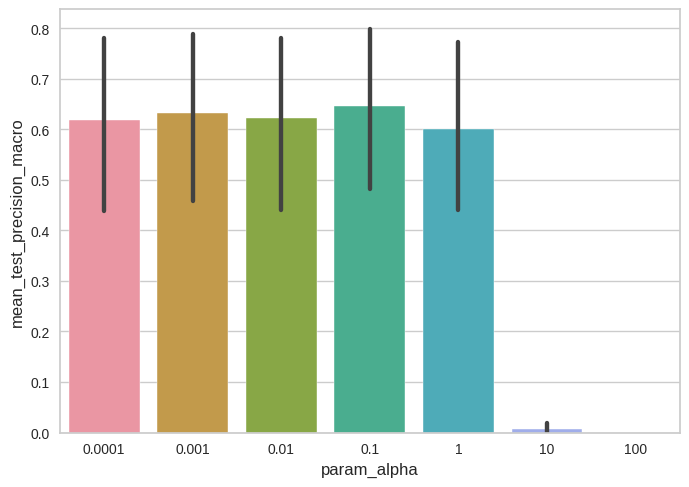

In [97]:
sns.barplot(data=df, x='param_alpha', y='mean_test_precision_macro')

In [98]:
pivot=pd.pivot_table(data=df, index='param_learning_rate_init', columns='param_hidden_layer_sizes', values='mean_test_precision_macro')

In [99]:
pivot

param_hidden_layer_sizes,"(10, 10, 10)","(100, 100)","(100, 100, 100)","(100, 100, 100, 100)","(100, 100, 100, 100, 100)"
param_learning_rate_init,,,,,
0.0001,0.558549,0.683057,0.677813,0.680618,0.683104
0.0010,0.672594,0.700373,0.686463,0.689442,0.687760
0.0100,0.665925,0.681560,0.673526,0.672904,0.645459
0.1000,0.359408,0.448917,0.251567,0.047912,0.000000
1.0000,0.000000,0.000000,0.000000,0.007143,0.000000


<Axes: xlabel='param_hidden_layer_sizes', ylabel='param_learning_rate_init'>

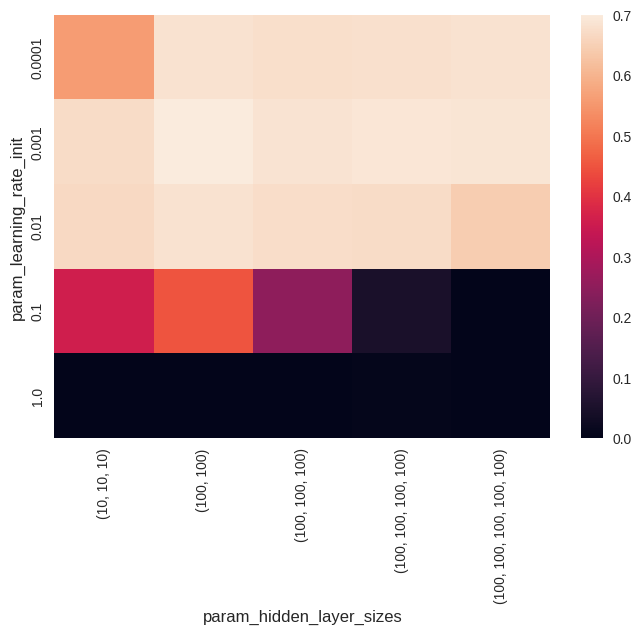

In [100]:
sns.heatmap(data=pivot)